## 线性回归练习 
- 身高预测体重
- 使用的三方库 sklearn

In [1]:
# 引入sklearn库，主要是为了使用其中的线性回归模块
from sklearn import datasets,linear_model
# 引入train_test_split是用来把数据集分为训练集和测试集
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# 创建数据集  10行2列数据，第一列是身高，第二列是体重
data = np.array([[152,51],[156,53],[160,54],[164,55],
                 [168,57],[172,60],[176,62],[180,65],
                 [184,69],[188,72]])

# X,y分别存放特征向量和标签，这里边使用reshape的目的是data[:,0]是一个一维的数组，但后边模型调用的时候要求是矩阵的形式
X,y = data[:,0].reshape(-1,1),data[:,1]
# 训练集和测试集区分开
# train_size=0.8的意思就是随机提取80%的数据作为训练数据
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

# 实现线性回归算法模型
regr = linear_model.LinearRegression()
# 拟合数据,训练模型
regr.fit(X_train,y_train)
# score得到的返回结果是决定系数R平方值
regr.score(X_train,y_train)
# """
# u = (y的实际值-y的预期值)的平方的求和
# v = (y的实际值-y的实际值的平均值)的平方的求和
# 决定系数R的平方值 = 1-u/v
# """



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9679432625582923

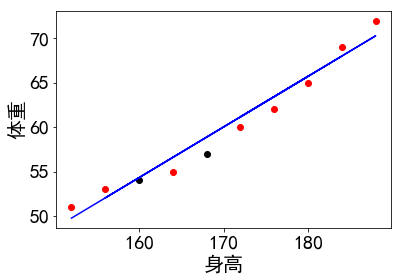

In [16]:
font = {'family':"SimHei",'size':20}
plt.rc('font',**font)
# 画训练数据
plt.scatter(X_train,y_train,color='r')
# 画线条,拟合线
plt.plot(X_train,regr.predict(X_train),color='b')
# 画测试数据
plt.scatter(X_test,y_test,color='black')

plt.xlabel('身高')
plt.ylabel('体重')
plt.show()


In [17]:
# 做预测
# 预测身高是163的人，他的体重是多少呢
regr.predict([[170]])

array([60.01919866])

## KNN练习

In [19]:
# make_blobs这个函数是用来生成数据的
from sklearn.datasets.samples_generator import make_blobs

centers = [[-2,2],[2,2],[0,4]]
# n_samples的意思是生成样本的数量
# centers的意思是围绕着哪些点生成
x,y = make_blobs(n_samples=60, centers=centers, cluster_std=0.6)
x

array([[ 1.68668141,  2.04053332],
       [ 1.43337134,  2.439762  ],
       [ 0.51345167,  3.12720381],
       [ 2.43859542,  1.78477726],
       [-0.98475152,  1.82800514],
       [-2.02384738,  1.52030168],
       [-0.40771305,  4.77074136],
       [ 1.35639731,  2.06076621],
       [-1.93230368,  2.06452083],
       [ 2.48831213,  2.35154144],
       [-2.0738864 ,  1.83882704],
       [-0.05560602,  4.68903876],
       [ 1.60054986,  1.49123052],
       [-1.69151098,  1.30777378],
       [ 0.57910579,  3.41826556],
       [-2.47949292,  2.29672107],
       [ 0.728251  ,  4.62815844],
       [-0.39179272,  4.24642842],
       [-1.31316804,  4.44847732],
       [ 2.12600588,  2.19423965],
       [-2.36036792,  2.67980732],
       [ 0.38972613,  4.23269284],
       [ 1.04927546,  3.94993319],
       [-0.7399749 ,  4.78518207],
       [ 1.22679983,  2.05578747],
       [ 1.35925204,  0.67289079],
       [ 0.15488897,  4.33048074],
       [-2.50754767,  1.44853089],
       [-1.82200466,

In [20]:
y

array([1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 2, 1, 0,
       0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1])

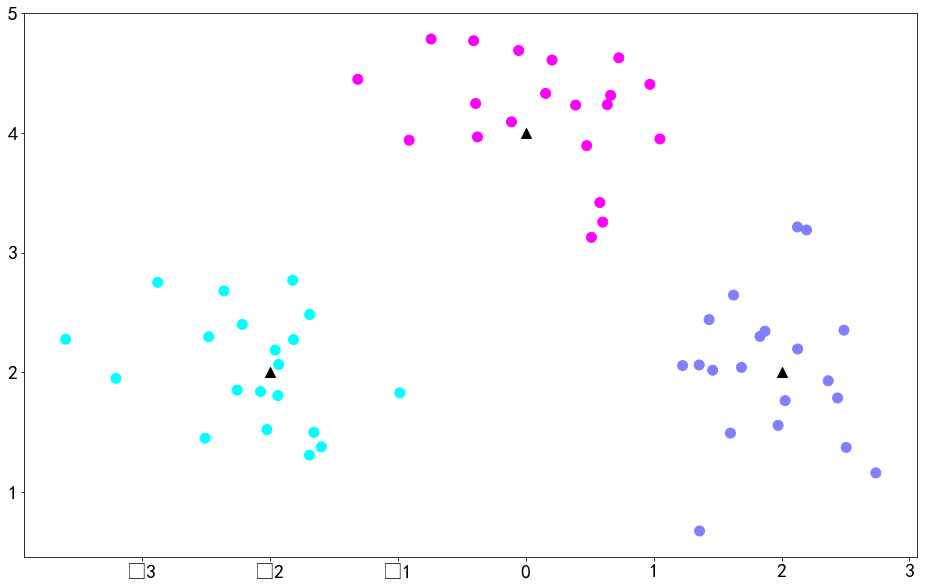

In [23]:
plt.figure(figsize=(16,10))
c = np.array(centers)

plt.scatter(x[:,0],x[:,1], c=y, s=100, cmap='cool')
# 中心点画一下
plt.scatter(c[:,0],c[:,1], s= 100, marker="^", c='black')
plt.show()

In [25]:
# 使用KNeighborsClassifier 对算法进行训练

from sklearn.neighbors import KNeighborsClassifier
k = 5
# 模型训练
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
# 对一个新的样本进行预测
x_sample = [[0,2]]
neighbors = clf.kneighbors(x_sample)
neighbors[1]


array([[ 4, 24,  2,  7, 55]])

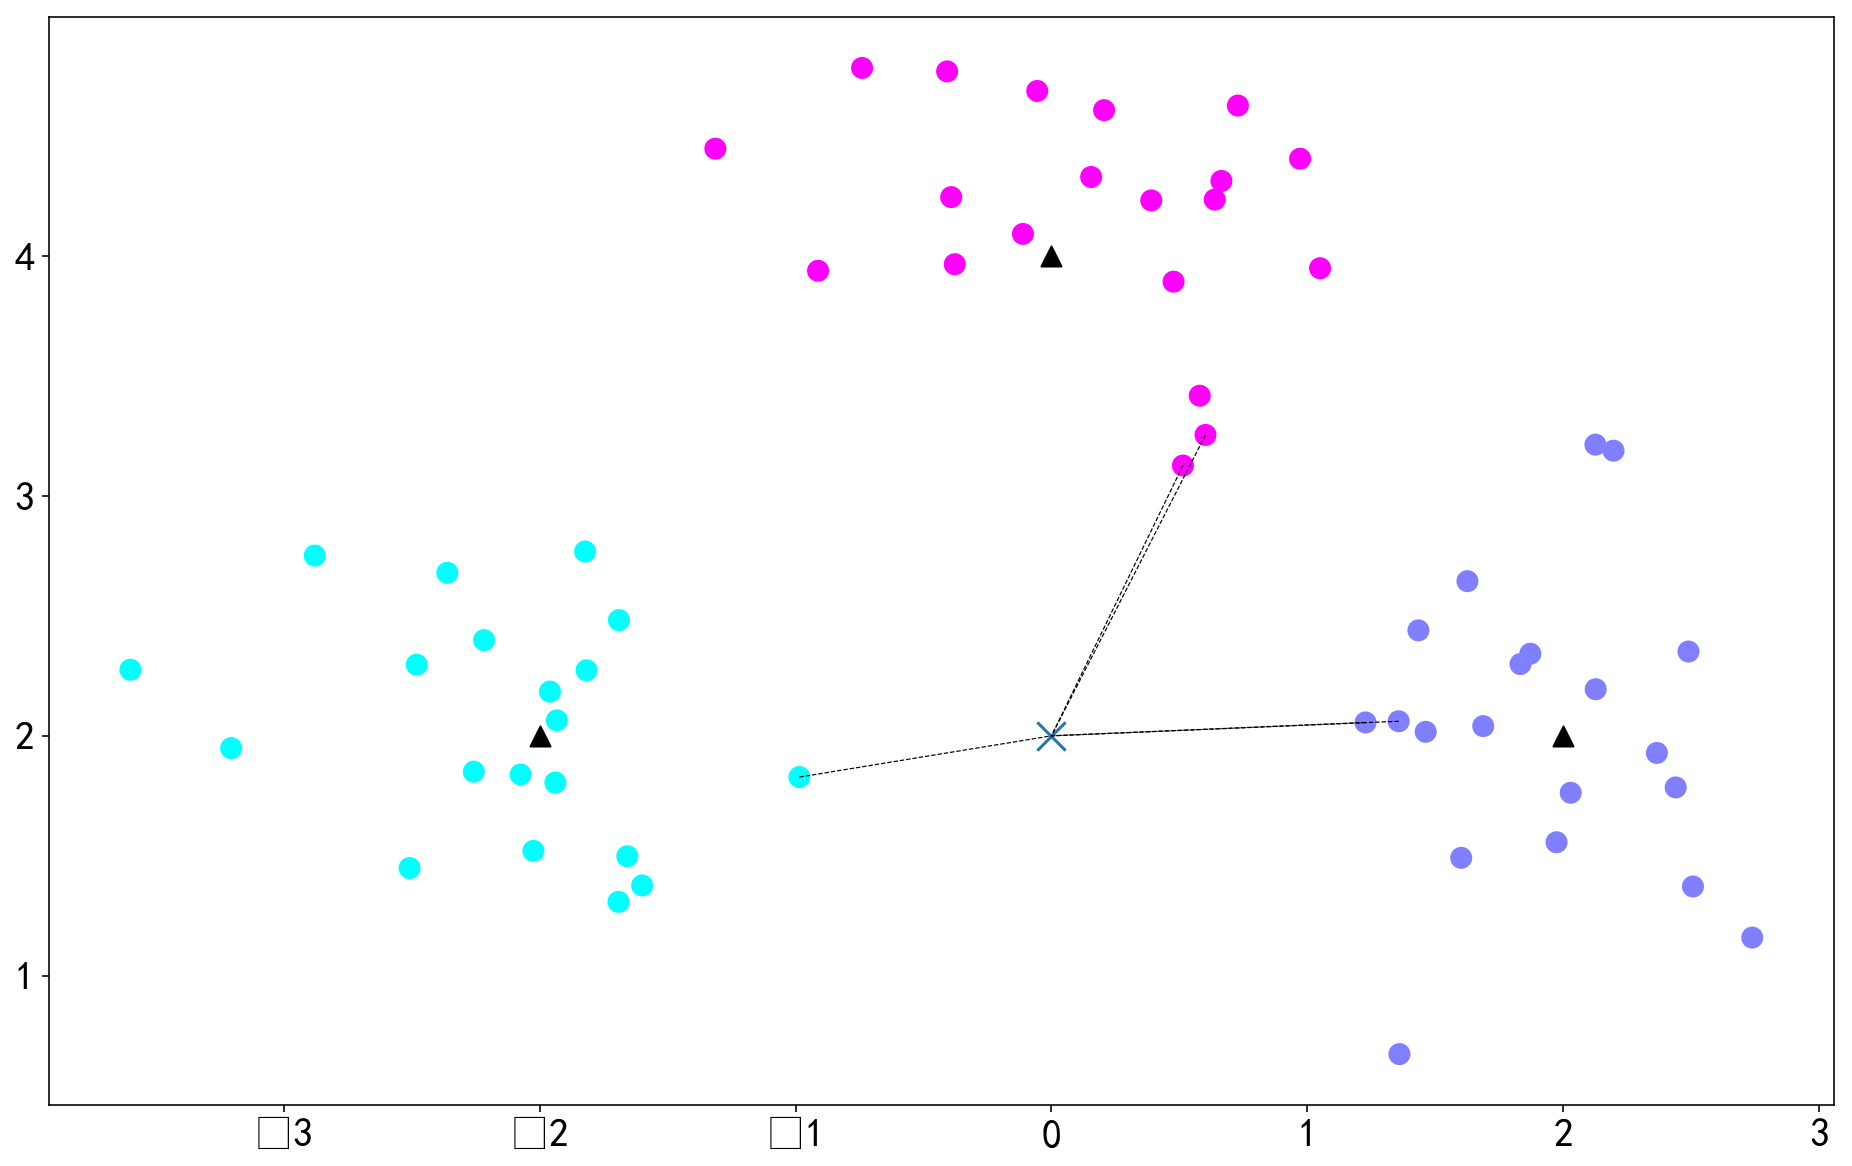

In [39]:
plt.figure(figsize=(16,10), dpi=144)

plt.scatter(x[:,0],x[:,1], c=y, s=100, cmap='cool')
# 中心点画一下
plt.scatter(c[:,0],c[:,1], s= 100, marker="^", c='black')

# 画待预测的点
plt.scatter(x_sample[0][0],x_sample[0][1], marker='x', s=200,cmap='cool')

# 把预测点与距离最近的5个样本连成线
for i in neighbors[1][0]:
    plt.plot([x[i][0], x_sample[0][0]], [x[i][1],x_sample[0][1]], 'k--', linewidth=0.6)

plt.show()

In [40]:
# 导入鸢尾花数据集
from sklearn.datasets import load_iris

In [48]:
iris = load_iris()
iris_data = iris.data
iris_data
# 萼片长度、萼片宽度、花瓣长度、花瓣宽度

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [49]:
# 获取样本标记值
iris_target = iris.target
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
# 划分训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(iris_data,iris_target,test_size=0.25)

In [51]:
# 训一下
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)

In [52]:
# 展示一下预测结果
labels=['山鸢尾','虹膜锦葵','变色鸢尾']
for i in range(len(y_predict)):
    print("第%d次测试:真实值是%s,预测值是%s" % ((i+1),labels[y_predict[i]],labels[y_test[i]]))

第1次测试:真实值是山鸢尾,预测值是山鸢尾
第2次测试:真实值是山鸢尾,预测值是山鸢尾
第3次测试:真实值是山鸢尾,预测值是山鸢尾
第4次测试:真实值是变色鸢尾,预测值是虹膜锦葵
第5次测试:真实值是虹膜锦葵,预测值是虹膜锦葵
第6次测试:真实值是山鸢尾,预测值是山鸢尾
第7次测试:真实值是虹膜锦葵,预测值是虹膜锦葵
第8次测试:真实值是山鸢尾,预测值是山鸢尾
第9次测试:真实值是变色鸢尾,预测值是变色鸢尾
第10次测试:真实值是虹膜锦葵,预测值是虹膜锦葵
第11次测试:真实值是山鸢尾,预测值是山鸢尾
第12次测试:真实值是变色鸢尾,预测值是变色鸢尾
第13次测试:真实值是变色鸢尾,预测值是变色鸢尾
第14次测试:真实值是虹膜锦葵,预测值是虹膜锦葵
第15次测试:真实值是虹膜锦葵,预测值是虹膜锦葵
第16次测试:真实值是虹膜锦葵,预测值是虹膜锦葵
第17次测试:真实值是变色鸢尾,预测值是变色鸢尾
第18次测试:真实值是山鸢尾,预测值是山鸢尾
第19次测试:真实值是虹膜锦葵,预测值是虹膜锦葵
第20次测试:真实值是变色鸢尾,预测值是变色鸢尾
第21次测试:真实值是山鸢尾,预测值是山鸢尾
第22次测试:真实值是山鸢尾,预测值是山鸢尾
第23次测试:真实值是变色鸢尾,预测值是变色鸢尾
第24次测试:真实值是虹膜锦葵,预测值是虹膜锦葵
第25次测试:真实值是山鸢尾,预测值是山鸢尾
第26次测试:真实值是变色鸢尾,预测值是变色鸢尾
第27次测试:真实值是变色鸢尾,预测值是变色鸢尾
第28次测试:真实值是虹膜锦葵,预测值是虹膜锦葵
第29次测试:真实值是虹膜锦葵,预测值是虹膜锦葵
第30次测试:真实值是变色鸢尾,预测值是变色鸢尾
第31次测试:真实值是变色鸢尾,预测值是变色鸢尾
第32次测试:真实值是山鸢尾,预测值是山鸢尾
第33次测试:真实值是山鸢尾,预测值是山鸢尾
第34次测试:真实值是山鸢尾,预测值是山鸢尾
第35次测试:真实值是虹膜锦葵,预测值是虹膜锦葵
第36次测试:真实值是变色鸢尾,预测值是变色鸢尾
第37次测试:真实值是山鸢尾,预测值是山鸢尾
第38次测试:真实值是虹膜锦葵,预测值是虹膜锦葵


In [53]:
knn.score(x_test,y_test)

0.9736842105263158

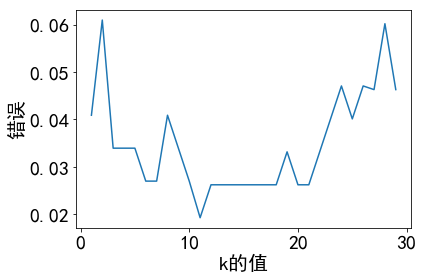

In [56]:
## 寻找最佳K值
from sklearn.model_selection import cross_val_score
k_range = range(1,30)
k_error = []
x = iris.data
y = iris.target
# 循环取 看误差效果
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cv参数也是划分训练集和测试集
    scores = cross_val_score(knn,x,y,cv=6)
    k_error.append(1-scores.mean())
plt.plot(k_range,k_error)
plt.xlabel('k的值')
plt.ylabel('错误')
plt.show()

## KMeans 聚类分析

In [57]:
from sklearn.cluster import KMeans

In [58]:
df = pd.read_csv("data.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [61]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [62]:
# 把列改成中文
df.columns=['用户ID',"性别","年龄","年收入","支出"]
df.head()

,用户ID,性别,年龄,年收入,支出
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 查看数据分布

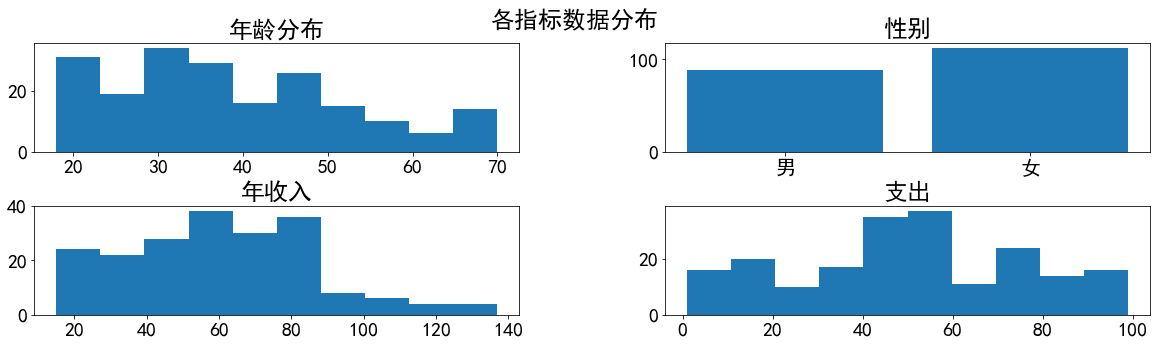

In [68]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('各指标数据分布')

# 画第一个图，年龄分布
ax = fig.add_subplot(221)
ax.hist(df['年龄'])
ax.title.set_text('年龄分布')

# 画第二个图，查看性别比例
ax = fig.add_subplot(222)
ax.bar(['男','女'],height=[(df['性别']=='Male').sum(),(df['性别']=='Female').sum()])
ax.title.set_text("性别")

# 画第三个图，年收入
ax = fig.add_subplot(223)
ax.hist(df['年收入'])
ax.title.set_text("年收入")


# 画第4个图，支出
ax = fig.add_subplot(224)
ax.hist(df['支出'])
ax.title.set_text("支出")

fig.subplots_adjust(wspace=0.3,hspace=0.5)


## 年龄与年收入之间的关系

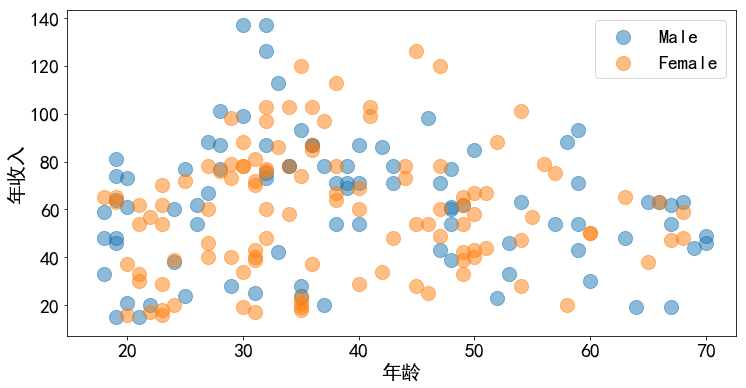

In [70]:
plt.figure(figsize=(12,6))
for gender in ['Male','Female']:
    plt.scatter(x='年龄',y='年收入', data=df[df['性别']==gender],s=200,alpha=0.5,label=gender)

plt.xlabel('年龄')
plt.ylabel('年收入')
plt.legend()
plt.show()

## 看一下各个年龄段的支出情况（年龄和支出之间的关系）


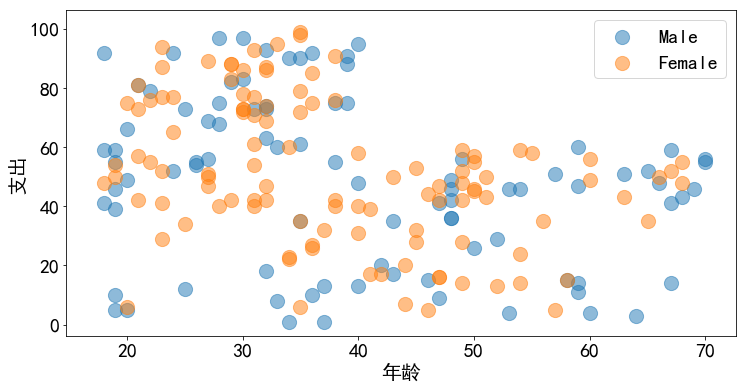

In [71]:
plt.figure(figsize=(12,6))
for gender in ['Male','Female']:
    plt.scatter(x='年龄',y='支出', data=df[df['性别']==gender],s=200,alpha=0.5,label=gender)

plt.xlabel('年龄')
plt.ylabel('支出')
plt.legend()
plt.show()

## 收入与支出的关系

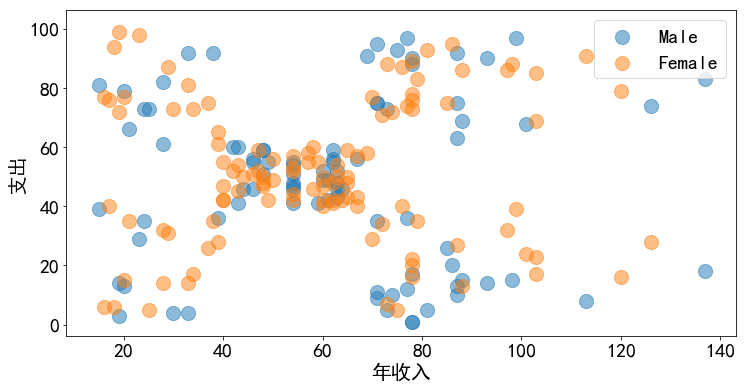

In [72]:
plt.figure(figsize=(12,6))
for gender in ['Male','Female']:
    plt.scatter(x='年收入',y='支出', data=df[df['性别']==gender],s=200,alpha=0.5,label=gender)

plt.xlabel('年收入')
plt.ylabel('支出')
plt.legend()
plt.show()

## 使用KMeans聚类分析一下

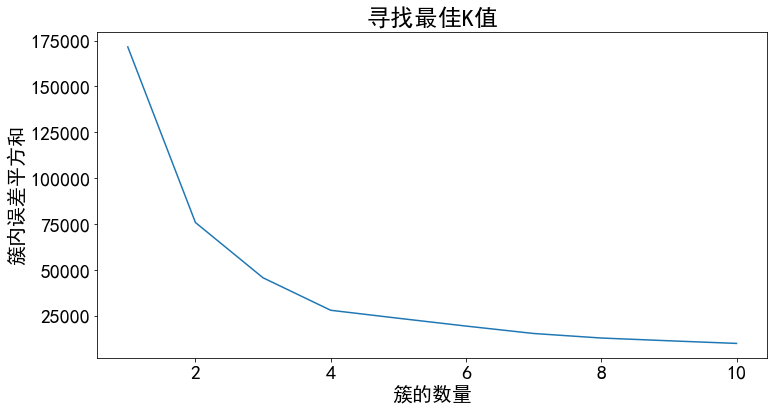

In [73]:
## 寻找最佳K值
x1 = df[['年龄','支出']].values
inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x1)
    inertia.append(km.inertia_)  #簇内的误差平方和
plt.figure(figsize=(12,6))
plt.plot(range(1,11),inertia)

plt.title("寻找最佳K值")
plt.xlabel('簇的数量')
plt.ylabel('簇内误差平方和')
plt.show()

In [74]:
km = KMeans(n_clusters=4)
y_means = km.fit_predict(x1)
y_means

array([3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 3, 0, 1, 3, 1,
       0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3,
       0, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

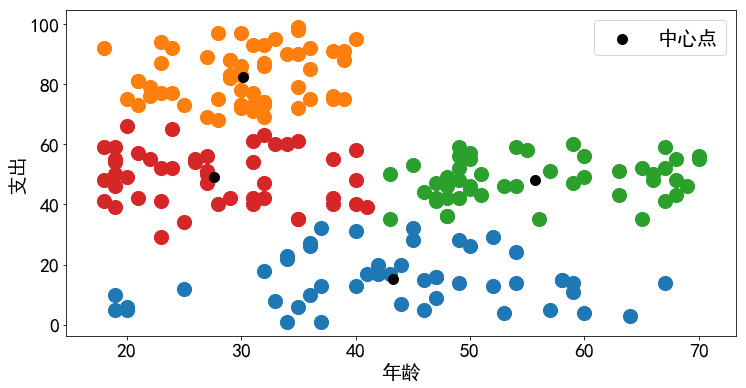

In [77]:
plt.figure(figsize=(12,6))
plt.scatter(x1[y_means==0,0],x1[y_means==0,1],s=200 )
plt.scatter(x1[y_means==1,0],x1[y_means==1,1],s=200 )
plt.scatter(x1[y_means==2,0],x1[y_means==2,1],s=200 )
plt.scatter(x1[y_means==3,0],x1[y_means==3,1],s=200 )
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=100, c='black', label='中心点')
plt.xlabel('年龄')
plt.ylabel('支出')
plt.legend()
plt.show()

## 根据收入和支出来看其关系

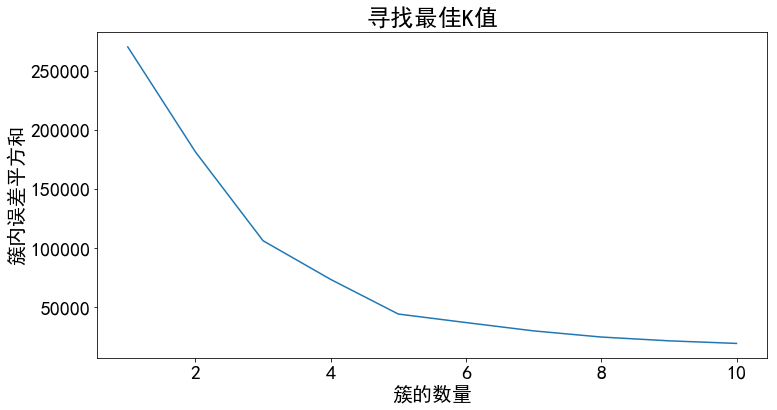

In [78]:
## 寻找最佳K值
x1 = df[['年收入','支出']].values
inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x1)
    inertia.append(km.inertia_)  #簇内的误差平方和
plt.figure(figsize=(12,6))
plt.plot(range(1,11),inertia)

plt.title("寻找最佳K值")
plt.xlabel('簇的数量')
plt.ylabel('簇内误差平方和')
plt.show()

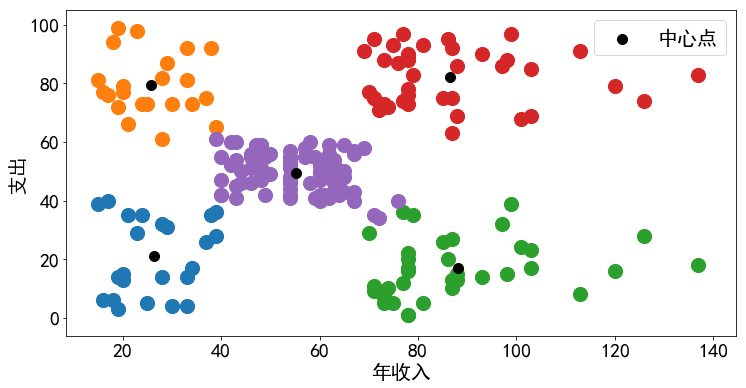

In [81]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(x1)
y_means

plt.figure(figsize=(12,6))
plt.scatter(x1[y_means==0,0],x1[y_means==0,1],s=200 )
plt.scatter(x1[y_means==1,0],x1[y_means==1,1],s=200 )
plt.scatter(x1[y_means==2,0],x1[y_means==2,1],s=200 )
plt.scatter(x1[y_means==3,0],x1[y_means==3,1],s=200 )
plt.scatter(x1[y_means==4,0],x1[y_means==4,1],s=200 )
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=100, c='black', label='中心点')
plt.xlabel('年收入')
plt.ylabel('支出')
plt.legend()
plt.show()

### 额外补充，作为了解，先不用掌握，3个特征

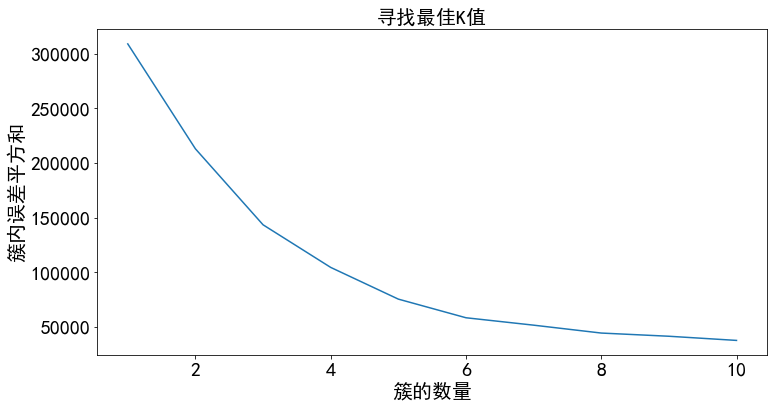

In [85]:
x=df[['年龄' , '年收入' ,'支出']].values
inertia=[]
for i in range(1,11):  
    km=KMeans(n_clusters=i)
    km.fit(x)
    inertia.append(km.inertia_)
plt.figure(1,figsize=(12,6))    
plt.plot(range(1,11),inertia)
plt.title('寻找最佳K值',fontsize=20)
plt.xlabel('簇的数量')
plt.ylabel('簇内误差平方和')
plt.show()

In [93]:
algorithm = (KMeans(n_clusters = 6 ,max_iter=300, tol=0.0001,  random_state= 100  , algorithm='elkan') )
algorithm.fit(x)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [94]:
import plotly as py
import plotly.graph_objects as go

df['label'] = labels
trace1 = go.Scatter3d(
    x= df['年龄'],
    y= df['年收入'],
    z= df['支出'],
    mode='markers',
     marker=dict(
        color = df['label'], 
        size= 15,
        line=dict(
            color= df['label'],
            width= 10
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    height=800,
    width=800,
    title= '聚类分析',
    scene = dict(
            xaxis = dict(title  = '年龄'),
            yaxis = dict(title  = '年收入'),
            zaxis = dict(title  = '支出')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

KNN分类的原数据已经有标签，用来预测新值，是有监督的，kmeans是无监督的